#### 📚 <span style="color:#f6f794"> Importing libraries and setting displays </span>

In [142]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report, silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode

#### <span style="color:#f6f794"> Starting Kaggle API </span>

In [143]:
# Staarting Kaggle API
api = KaggleApi()
api.authenticate()

In [144]:
# Download dataset from Kaggle
!kaggle datasets download -d uciml/mushroom-classification -p datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0




  0%|          | 0.00/34.2k [00:00<?, ?B/s]
100%|██████████| 34.2k/34.2k [00:00<00:00, 25.9MB/s]


#### 🐼 <span style="color:#f6f794"> Reading CSV </span>

In [145]:
# Reading the dataset
df_mushrooms = pd.read_csv('datasets/mushrooms.csv')
df_mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 🔍 <span style="color:#f6f794"> Exploring Data </span>

#### 🙈 <span style="color:#f6f794"> Seeking for nulls </span>

In [146]:
df_mushrooms.isnull().sum() # priori no missing values
df_mushrooms.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4197,e,x,y,g,t,n,f,c,b,n,...,s,g,w,p,w,o,p,n,v,d
7697,p,k,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,l
2113,e,x,f,e,t,n,f,c,b,n,...,s,p,g,p,w,o,p,n,v,d
324,e,x,y,n,t,l,f,c,b,p,...,y,w,w,p,w,o,p,n,s,p
5609,p,f,s,g,t,f,f,c,b,p,...,s,w,w,p,w,o,p,h,v,g


In [147]:
# By reading the documentation, we know that the dataset has missing values represented by '?', let's check it
sospechosos = ['?', '-', '', ' ', '/', 'NA', 'N/A', 'null', 'NULL', 'NaN', 'nan']

for val in sospechosos:
    print(f"\nValores '{val}' por columna:")
    print((df_mushrooms == val).sum())



Valores '?' por columna:
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Valores '-' por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                      

In [148]:
for column in df_mushrooms.columns:
    if df_mushrooms[column].dtype == 'object':
        print(f"""Unique values in column '{column.upper()}':\nQTY: {df_mushrooms[column].nunique()} VALUES: {df_mushrooms[column].unique()}
              \n==========================================================================================""")

Unique values in column 'CLASS':
QTY: 2 VALUES: ['p' 'e']
              
Unique values in column 'CAP-SHAPE':
QTY: 6 VALUES: ['x' 'b' 's' 'f' 'k' 'c']
              
Unique values in column 'CAP-SURFACE':
QTY: 4 VALUES: ['s' 'y' 'f' 'g']
              
Unique values in column 'CAP-COLOR':
QTY: 10 VALUES: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
              
Unique values in column 'BRUISES':
QTY: 2 VALUES: ['t' 'f']
              
Unique values in column 'ODOR':
QTY: 9 VALUES: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
              
Unique values in column 'GILL-ATTACHMENT':
QTY: 2 VALUES: ['f' 'a']
              
Unique values in column 'GILL-SPACING':
QTY: 2 VALUES: ['c' 'w']
              
Unique values in column 'GILL-SIZE':
QTY: 2 VALUES: ['n' 'b']
              
Unique values in column 'GILL-COLOR':
QTY: 12 VALUES: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
              
Unique values in column 'STALK-SHAPE':
QTY: 2 VALUES: ['e' 't']
              
Unique values in column 

In [149]:
for column in df_mushrooms.columns:
    if df_mushrooms[column].isnull().any():
        print(f"Column '{column}' has {df_mushrooms[column].isnull().sum()} missing values.")

In [150]:
for column in df_mushrooms.columns:
    # Convert to str to avoid errors like NaN/None
    col_str = df_mushrooms[column].astype(str)

    # Values which are not exactly 1 single letter in minus a-z
    non_matching = col_str.loc[~col_str.str.fullmatch(r'[a-z]')]

    if not non_matching.empty:
        print(f"⚠️ Column '{column.upper()}' has {non_matching.shape[0]} values that don't match the pattern 'a-z' (single lowercase letter):")
        print(non_matching.value_counts())


⚠️ Column 'STALK-ROOT' has 2480 values that don't match the pattern 'a-z' (single lowercase letter):
stalk-root
?    2480
Name: count, dtype: int64


#### ☝️ <span style="color:#f6f794"> Changing values in [stalk-root] </span>

In [151]:
# Chaning '?' to NaN for easier handling of missing values
df_mushrooms["stalk-root"].replace('?', np.nan, inplace=True)

# Checking for missing values after replacement
print((df_mushrooms["stalk-root"] == '?').sum())
print(df_mushrooms["stalk-root"].isnull().sum())

0
2480


C:\Users\yaelp\AppData\Local\Temp\ipykernel_40976\1262010487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mushrooms["stalk-root"].replace('?', np.nan, inplace=True)


####  <span style="color:#f6f794"> Continue checking </span>

In [152]:
df_mushrooms.describe(include='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [153]:
df_mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1492,e,f,s,n,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,s,g
1480,e,f,s,n,f,n,f,w,b,k,...,f,w,w,p,w,o,e,n,a,g
7102,p,k,y,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
3135,e,f,y,e,t,n,f,c,b,p,...,s,w,p,p,w,o,p,k,y,d
2150,e,x,f,e,t,n,f,c,b,u,...,s,g,p,p,w,o,p,k,y,d
2999,e,x,y,n,t,n,f,c,b,u,...,s,w,p,p,w,o,p,n,v,d
4074,e,f,y,n,t,n,f,c,b,p,...,s,g,g,p,w,o,p,n,v,d
2268,e,x,y,e,t,n,f,c,b,p,...,s,w,w,p,w,o,p,k,y,d
1747,e,f,f,n,f,n,f,c,n,p,...,s,w,w,p,w,o,p,k,y,u
3680,e,f,y,e,t,n,f,c,b,n,...,s,p,p,p,w,o,p,k,y,d


#### 🗺️ <span style="color:#f6f794"> Maping Data to understand </span>

| Attribute Information | Description |
|---|---|
| **class** | edible=e, poisonous=p |
| **cap-shape**| bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s |
| **cap-surface**| fibrous=f, grooves=g, scaly=y, smooth=s |
| **cap-color**| brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| **bruises**| bruises=t, no=f |
| **odor**| almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| **gill-attachment**| attached=a, descending=d, free=f, notched=n |
| **gill-spacing**| close=c, crowded=w, distant=d |
| **gill-size**| broad=b, narrow=n |
| **gill-color**| black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| **stalk-shape**| enlarging=e, tapering=t |
| **stalk-root**| bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| **stalk-surface-above-ring**| fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-surface-below-ring**| fibrous=f, scaly=y, silky=k, smooth=s |
| **stalk-color-above-ring**| brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **stalk-color-below-ring**| brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| **veil-type**| partial=p, universal=u |
| **veil-color**| brown=n, orange=o, white=w, yellow=y |
| **ring-number**| none=n, one=o, two=t |
| **ring-type**| cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| **spore-print-color**| black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
| **population**| abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| **habitat**| grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d |

In [154]:
attribute_mappings = {
    'class': {
        'e': 'edible',
        'p': 'poisonous'
    },
    'cap-shape': {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    },
    'cap-surface': {
        'f': 'fibrous',
        'g': 'grooves',
        'y': 'scaly',
        's': 'smooth'
    },
    'cap-color': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'r': 'green',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'bruises': {
        't': 'bruises',
        'f': 'no'
    },
    'odor': {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    },
    'gill-attachment': {
        'a': 'attached',
        'd': 'descending',
        'f': 'free',
        'n': 'notched'
    },
    'gill-spacing': {
        'c': 'close',
        'w': 'crowded',
        'd': 'distant'
    },
    'gill-size': {
        'b': 'broad',
        'n': 'narrow'
    },
    'gill-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'g': 'gray',
        'r': 'green',
        'o': 'orange',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-shape': {
        'e': 'enlarging',
        't': 'tapering'
    },
    'stalk-root': {
        'b': 'bulbous',
        'c': 'club',
        'u': 'cup',
        'e': 'equal',
        'z': 'rhizomorphs',
        'r': 'rooted',
        '?': 'missing'
    },
    'stalk-surface-above-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-surface-below-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-color-above-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-color-below-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'veil-type': {
        'p': 'partial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'brown',
        'o': 'orange',
        'w': 'white',
        'y': 'yellow'
    },
    'ring-number': {
        'n': 'none',
        'o': 'one',
        't': 'two'
    },
    'ring-type': {
        'c': 'cobwebby',
        'e': 'evanescent',
        'f': 'flaring',
        'l': 'large',
        'n': 'none',
        'p': 'pendant',
        's': 'sheathing',
        'z': 'zone'
    },
    'spore-print-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'r': 'green',
        'o': 'orange',
        'u': 'purple',
        'w': 'white',
        'y': 'yellow'
    },
    'population': {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    },
    'habitat': {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }
}


In [155]:
def decode_feature(value, feature_name):
    """Decode a feature using the mapping dictionary"""
    return attribute_mappings[feature_name].get(value, value)

# Transfor all dataframe
def decode_dataframe(df):
    df_mapped = df.copy()

    for column in df.columns:
        if column in attribute_mappings:
            df_mapped[column] = df_mapped[column].apply(lambda x: decode_feature(x, column))
    return df_mapped

df_mapped = decode_dataframe(df_mushrooms)

In [156]:
for column in df_mapped.columns:
    if df_mapped[column].dtype == 'object':
        print(f"""Unique values in column '{column.upper()}':\nQTY: {df_mapped[column].nunique()} VALUES: {df_mapped[column].unique()}
              \n==========================================================================================""")

Unique values in column 'CLASS':
QTY: 2 VALUES: ['poisonous' 'edible']
              
Unique values in column 'CAP-SHAPE':
QTY: 6 VALUES: ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
              
Unique values in column 'CAP-SURFACE':
QTY: 4 VALUES: ['smooth' 'scaly' 'fibrous' 'grooves']
              
Unique values in column 'CAP-COLOR':
QTY: 10 VALUES: ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
              
Unique values in column 'BRUISES':
QTY: 2 VALUES: ['bruises' 'no']
              
Unique values in column 'ODOR':
QTY: 9 VALUES: ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
              
Unique values in column 'GILL-ATTACHMENT':
QTY: 2 VALUES: ['free' 'attached']
              
Unique values in column 'GILL-SPACING':
QTY: 2 VALUES: ['close' 'crowded']
              
Unique values in column 'GILL-SIZE':
QTY: 2 VALUES: ['narrow' 'broad']
              
Unique values in column 'GILL-COLOR':
QTY:

#### 🎯 <span style="color:#f6f794"> Looking for non relevant information columns </span>

In [157]:
len(df_mapped["veil-type"]) # 8124
len(df_mapped["veil-type"].unique()) # 1

1

This column is irrelevant because it has only one value therefore it doesn't bring anything to the table.

In [158]:
df_mapped.drop(columns=['veil-type'], inplace=True)

#### 👍 <span style="color:#f6f794"> Studying if we can impute values in [stalk-root] </span>

In [159]:
print((df_mapped["stalk-root"].value_counts(dropna=False, normalize=True) * 100).round(2).astype(str) + " %") # 30.53 % are null

stalk-root
bulbous    46.48 %
NaN        30.53 %
equal      13.79 %
club        6.84 %
rooted      2.36 %
Name: proportion, dtype: object


<Axes: xlabel='class', ylabel='count'>

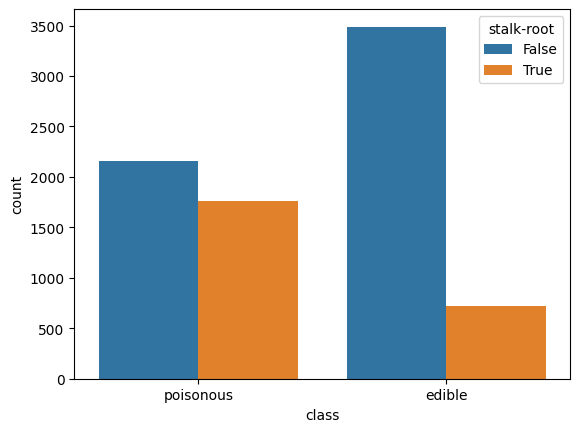

In [160]:
# Visualizing the NaN values in 'stalk-root' column's distribution
sns.countplot(x=df_mapped["class"], hue=df_mapped["stalk-root"].isna())

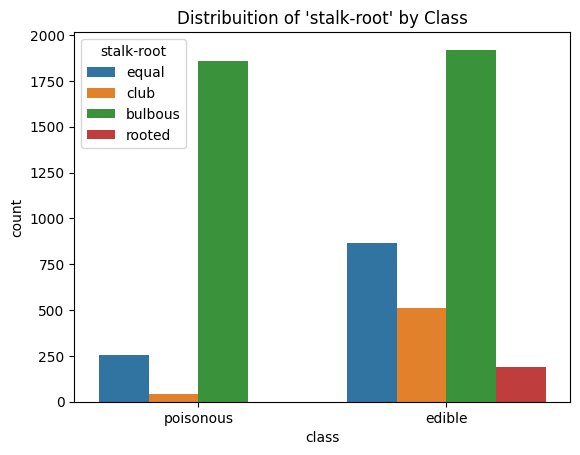

In [161]:
# Visualizing the distribution of 'stalk-root' by class
sns.countplot(x="class", hue="stalk-root", data=df_mapped)
plt.title("Distribuition of 'stalk-root' by Class")
plt.legend(title="stalk-root")
plt.xticks(rotation=0)
plt.show()

#### 👌 <span style="color:#f6f794"> Imputing by the mode but grouping it by [class] </span>

In [162]:
# Imputing missing values in 'stalk-root' based on the mode of each class
df_mapped["stalk-root"] = df_mapped.groupby("class")["stalk-root"].transform(lambda x: x.fillna(x.mode()[0]))

Después de imputar:
stalk-root
bulbous    77.0
equal      13.8
club        6.8
rooted      2.4
Name: proportion, dtype: float64


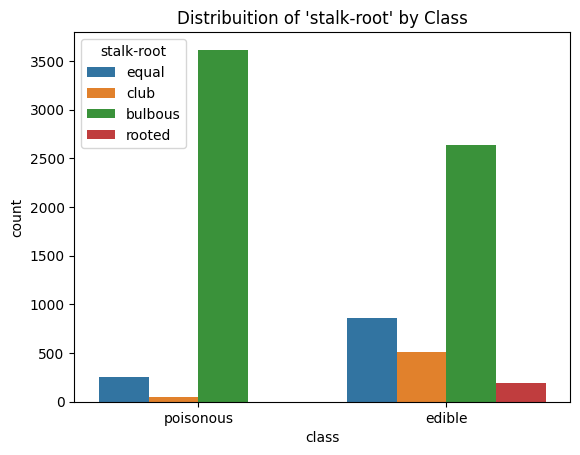

In [163]:
print("Después de imputar:")
print(df_mapped["stalk-root"].value_counts(normalize=True).round(3) * 100)

# Visualizing the distribution of 'stalk-root' by class
sns.countplot(x="class", hue="stalk-root", data=df_mapped)
plt.title("Distribuition of 'stalk-root' by Class")
plt.legend(title="stalk-root")
plt.xticks(rotation=0)
plt.show()


#### 💪🏋️‍♀️ <span style="color:#f6f794"> Checking strong correlated values [class] </span>

In [164]:
def cramers_v(x, y):
    """Calcula Cramér's V para dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # corrección de bias
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular Cramér's V entre cada columna categórica y la variable objetivo
cramers_scores = {}
for col in df_mapped.columns:
    if col != 'class': # Excluding the target variable "class"
        cramers_scores[col] = cramers_v(df_mapped[col], df_mapped['class'])

# Convertir en DataFrame ordenado por relevancia
cramers_df = pd.DataFrame.from_dict(cramers_scores, orient='index', columns=['Cramers_V'])
cramers_df = cramers_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_df)

                          Cramers_V
odor                       0.970558
spore-print-color          0.752036
gill-color                 0.679877
ring-type                  0.602900
stalk-surface-above-ring   0.587666
stalk-surface-below-ring   0.574551
gill-size                  0.539677
stalk-color-above-ring     0.523943
stalk-color-below-ring     0.513799
bruises                    0.501188
population                 0.486775
habitat                    0.439323
stalk-root                 0.360578
gill-spacing               0.347897
cap-shape                  0.244330
cap-color                  0.215889
ring-number                0.214212
cap-surface                0.195997
veil-color                 0.152222
gill-attachment            0.127951
stalk-shape                0.101170


#### 💪🏋️‍♀️ <span style="color:#f6f794"> Iterpreting Cramer's values [class] </span>

| Cramer's V | Interpretation                 |
| ---------- | ------------------------------ |
| 0.0 – 0.1  | Very weak or irrelevant        |
| 0.1 – 0.3  | Weak but potentially usefull   |
| 0.3 – 0.5  | Moderated                      |
| 0.5 – 1.0  | Strong                         |


In [165]:
weak_features = ['cap-shape', 'cap-color', 'ring-number', 'cap-surface', 'veil-color', 'gill-attachment', 'stalk-shape']

df_strong = df_mapped.drop(columns=weak_features).copy()
df_strong = df_strong.drop(columns="class", axis=1)
df_strong.columns

Index(['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 👁️ <span style="color:#f6f794"> Visualizing Cramer's values correlation [class] </span>


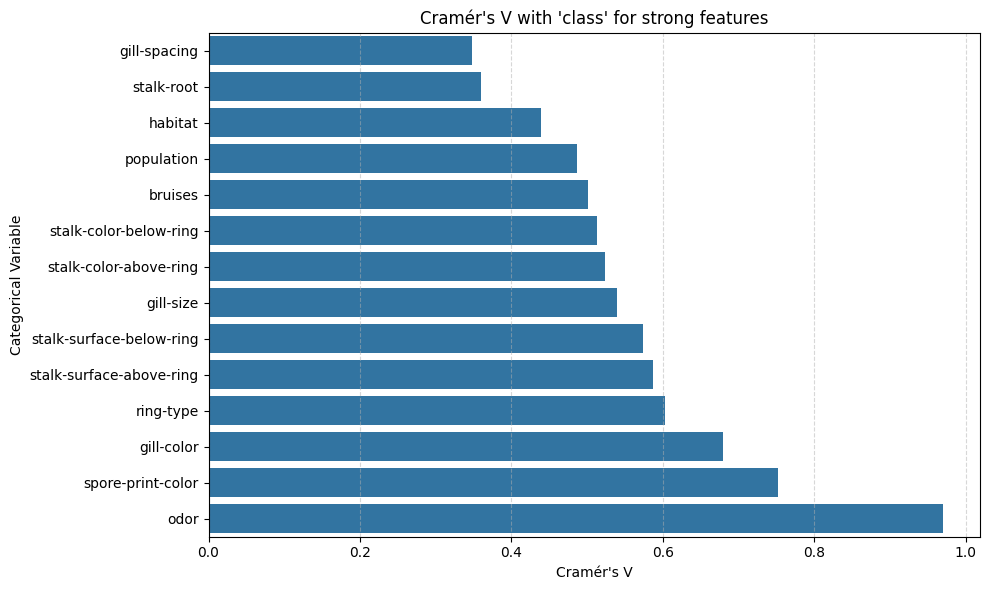

In [166]:
cols_to_plot = df_strong.columns 
cramers_subset = cramers_df.loc[cols_to_plot]

# Ordenamos por valor para graficar
cramers_subset = cramers_subset.sort_values(by='Cramers_V', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cramers_subset.reset_index(),
    y='index',
    x='Cramers_V'
)
plt.title("Cramér's V with 'class' for strong features")
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Variable")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

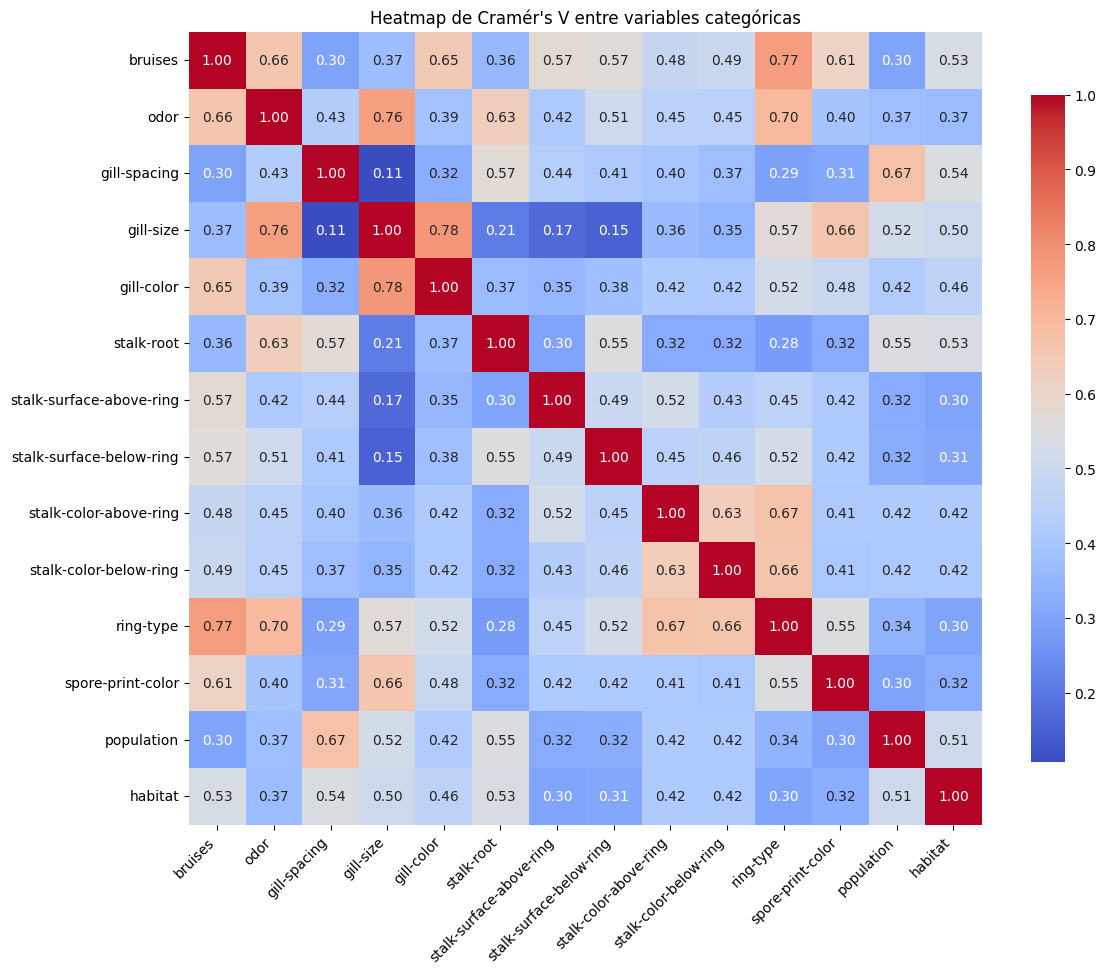

In [167]:
def cramers_v(x, y): # Función para calcular el Cramér's V corregido entre dos variables categóricas
    
    confusion_matrix = pd.crosstab(x, y) # Construye la tabla de contingencia (frecuencias cruzadas) entre x e y
    
    chi2 = chi2_contingency(confusion_matrix)[0] # Calcula el estadístico chi-cuadrado para la tabla de contingencia
    n = confusion_matrix.sum().sum()  # Número total de observaciones en la tabla
    phi2 = chi2 / n # Calcula phi2: chi2 normalizado por el total de observaciones
    r, k = confusion_matrix.shape  # Número de filas (categorías de x) y columnas (categorías de y)
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1)) # Corrección de phi2 para tablas con muchas categorías o muestras pequeñas
    
    rcorr = r - ((r - 1)**2) / (n - 1) # Corrección en los grados de libertad para filas y columnas
    kcorr = k - ((k - 1)**2) / (n - 1)
    
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))) # Calcula y devuelve el Cramér's V corregido

cols = df_strong.columns # Lista de columnas con variables seleccionadas (fuertes)
n = len(cols) # Número de variables que vamos a comparar
matriz_cramers = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols) # Creamos un DataFrame vacío para almacenar los valores de Cramér's V entre pares

for i in range(n):# Recorremos todas las combinaciones únicas de variables para calcular Cramér's V
    for j in range(i, n):
        
        v = cramers_v(df_strong[cols[i]], df_strong[cols[j]]) # Calculamos el Cramér's V entre la variable i y la j
        matriz_cramers.iloc[i, j] = v # Guardamos el resultado en la matriz (parte superior)
        
        matriz_cramers.iloc[j, i] = v # Copiamos el valor a la parte inferior para mantener simetría

# print(matriz_cramers)

plt.figure(figsize=(12, 10))  # Ajusta tamaño de la figura para que se vea bien

# Mapa de calor con anotaciones de los valores (redondeados a 2 decimales)
sns.heatmap(matriz_cramers, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

plt.title("Heatmap de Cramér's V entre variables categóricas")
plt.xticks(rotation=45, ha="right")  # Gira etiquetas de eje x para mejor lectura
plt.yticks(rotation=0)  # Eje y sin rotación

plt.tight_layout()
plt.show()

In [168]:
df_strong.columns

Index(['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### 👁️ <span style="color:#f6f794"> Reducing columns based on redundancy and correlation in V Cramer's heatmap </span>

By looking at the heatmap, the below are the "to keep" columns

In [169]:
# Columns to keep

columns_to_keep = ['bruises', 'odor', 'gill-spacing', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-surface-above-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']

#### 🧨 <span style="color:#f6f794"> One-Hot Encoding </span>

In [170]:
# Variables reducidas
columns_to_keep = ['bruises', 'odor', 'gill-spacing', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-surface-above-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Selecting columns to keep
df_selected = df_strong[columns_to_keep]

# Starting OneHotEncoder using drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply One-Hot Encoding (returns numpy array)
encoded_array = encoder.fit_transform(df_selected)

# Creating new dataframe with encoded features
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_keep))


#### 🧨🧨 <span style="color:#f6f794"> Creating OneHotEncoded but with a dataframe with no eliminated columns (but veil_color which is irrelevant) </span>

In [171]:
# df_mapped

df_mapped_1 = df_mapped.drop(columns = "class")
encoder_test = OneHotEncoder(drop='first', sparse_output=False)
encoder_array_test = encoder_test.fit_transform(df_mapped_1)
df_test = pd.DataFrame(encoder_array_test, columns=encoder_test.get_feature_names_out(df_mapped_1.columns))


In [202]:
df_test.columns

Index(['cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_sunken', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_no', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_free',
       'gill-spacing_crowded', 'gill-size_narrow', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-shape_tapering', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_rooted',
       'stalk-surface-above-ring_scaly', 'stalk-surface-above-

#### ✂️ <span style="color:#f6f794"> Separating by predict and to predict variables [class] </span>

- edible: 0
- poisonous: 1


In [172]:
# Creating new dataframe in order not to lose the df_mapped, since this is only to encode the target and separate the target from the predictors
df_target_encoded = df_mapped.copy()

# Codification the target variable 'class' separately than the features
df_target_encoded['class_encoded'] = df_target_encoded['class'].map({'edible': 0, 'poisonous': 1})

In [199]:
# The variable [class] is the target variable, which indicates whether the mushroom is edible or poisonous.
y = df_target_encoded["class_encoded"]

# The rest of the columns are features that describe the characteristics of the mushrooms.
# df_encoded = with eliminated variables
# df_test = with no columns eliminated but veil color which is irrelevant
X = df_test

#### ✂️ <span style="color:#f6f794"> Spliting dataset for training and testing </span>

- train: 80%
- test: 20%

In [174]:
# Division for training with stratified sampling to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,             # 20% for testing
    stratify=y,                # To maintain the balance of the distribution of the target variable
    random_state=42            # For reproducibility
)

In [175]:
print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("\n")
print("Distribution for y_train:", y_train.value_counts(normalize=True).round(2))
print("Distributi y_test: ", y_test.value_counts(normalize=True).round(2))
# It is well balanced

Shape X_train: (6499, 94)
Shape X_test:  (1625, 94)


Distribution for y_train: class_encoded
0    0.52
1    0.48
Name: proportion, dtype: float64
Distributi y_test:  class_encoded
0    0.52
1    0.48
Name: proportion, dtype: float64


#### 🎯 <span style="color:#f6f794"> Applying PCA </span>

- In order to reduce components since there are a lot after the OneHotEncoding
- Scaling: adjusting columns so they can be on the same scale
- Checking number of components: 22 components are apparently needed to explain the variance

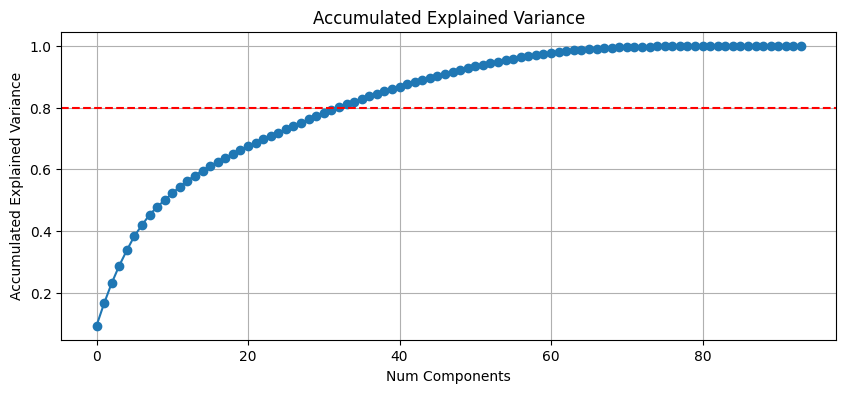

In [176]:
# 1. Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploring the qty of components are needed to explain a certain amount of variance
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Accumulated Explained Variance')
plt.xlabel('Num Components')
plt.ylabel('Accumulated Explained Variance')
plt.grid(True)
plt.show()
# Apparently 22 components are needed to explain 80% of the variance

cgeck target column and df_pca

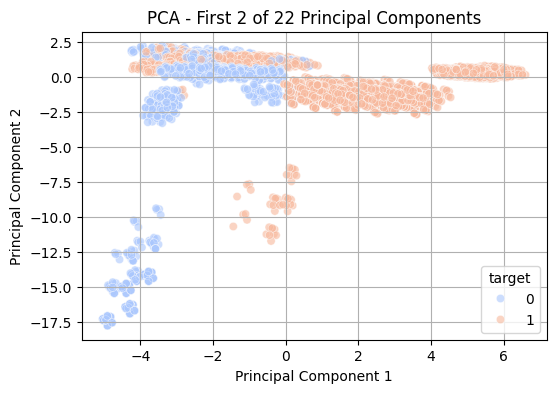

Variance explained by each component:
PC1: 0.0942
PC2: 0.0722
PC3: 0.0652
PC4: 0.0569
PC5: 0.0494
PC6: 0.0463
PC7: 0.0353
PC8: 0.0335
PC9: 0.0250
PC10: 0.0224
PC11: 0.0219
PC12: 0.0213
PC13: 0.0197
PC14: 0.0166
PC15: 0.0159
PC16: 0.0151
PC17: 0.0135
PC18: 0.0130
PC19: 0.0126
PC20: 0.0124
PC21: 0.0118
PC22: 0.0115
PC23: 0.0114
PC24: 0.0110
PC25: 0.0108
PC26: 0.0107
PC27: 0.0107
PC28: 0.0107
PC29: 0.0104
PC30: 0.0102
Total variance explained (22 components): 0.7717121437030461


In [177]:
# 2. Applying PCA to reduce dimensions to 22 components
# Checking with 30 too
pca = PCA(n_components=30)  # Reduce dimensionality to 22/30 principal components
X_pca = pca.fit_transform(X_scaled)  # Fit PCA on the scaled data and transform it

# 3. Creating a DataFrame with all PCA results (22 components)
# Dynamically generate column names: PC1 to PC22
pca_columns = [f'PC{i+1}' for i in range(30)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Add the target variable to the PCA result DataFrame
df_pca['target'] = y.values

# 4. Visualization of the first 2 principal components
# Note: Only 2D plot possible, so we use PC1 and PC2 for visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='coolwarm', alpha=0.6)
plt.title('PCA - First 2 of 22 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Print variance explained by each of the 22 components
print("Variance explained by each component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Print total variance explained by all 22 components
print("Total variance explained (22 components):", pca.explained_variance_ratio_.sum())

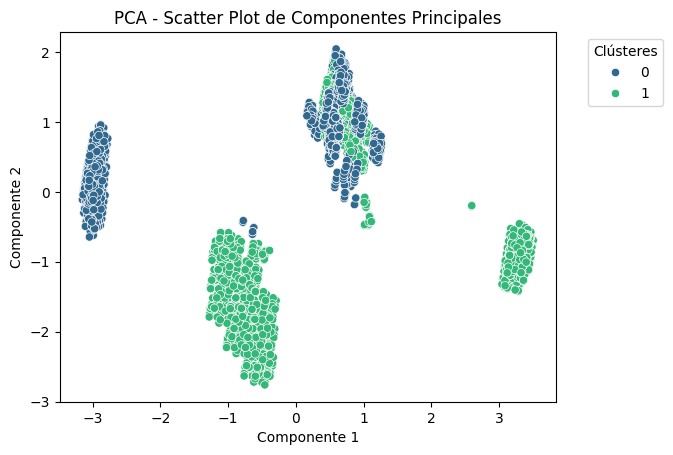

In [208]:
# Entrenar PCA para representar.
pca =  PCA(n_components=19)    # metodo de sklearn
X_pca = pca.fit_transform(X)

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
df_pca = pd.DataFrame(X_pca, columns=[f'Componente {i+1}' for i in range(19)])
df_pca['target'] = y.values
sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='target', palette='viridis')
plt.title('PCA - Scatter Plot de Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clústeres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

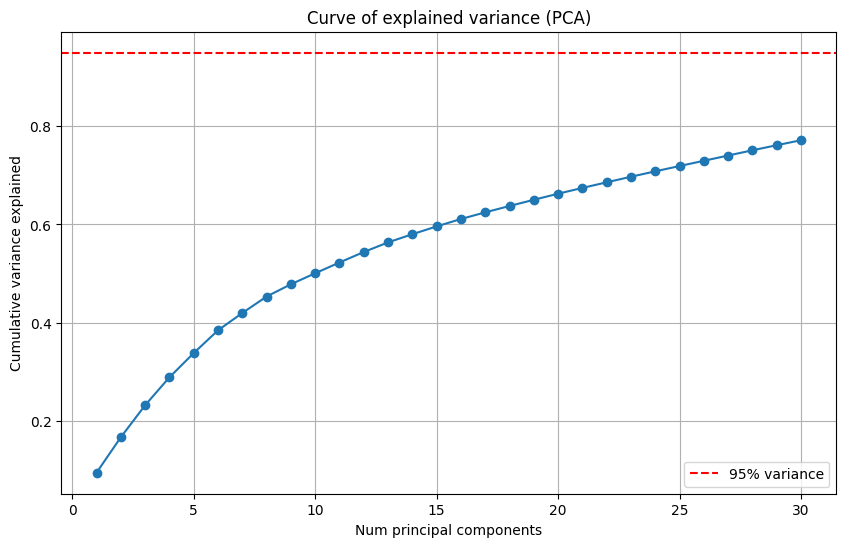

In [187]:
# 22 components
# Checking with 30 components
pca = PCA(n_components=30)
X_pca_22 = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), cum_var, marker='o')
plt.xlabel('Num principal components')
plt.ylabel('Cumulative variance explained')
plt.title('Curve of explained variance (PCA)')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.grid(True)
plt.show()

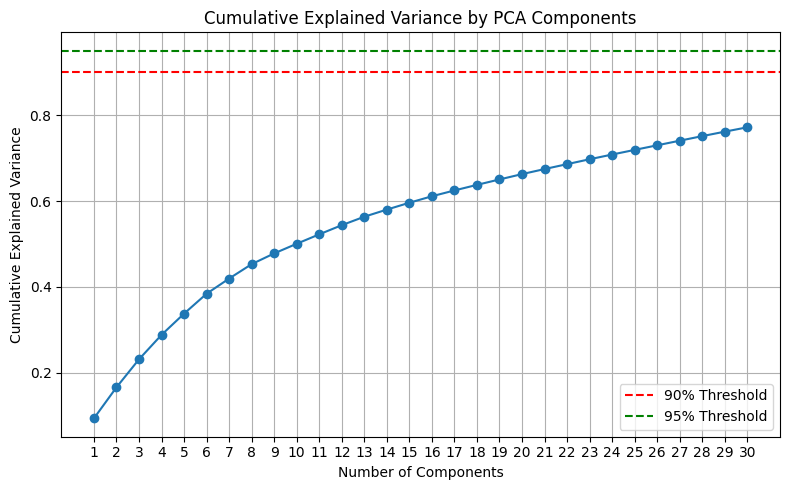

In [180]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 👯 <span style="color:#f6f794"> K means </span>

- Checking how many K should be used:
    - Methods:
        - Elbow:
            - 4 is ok
            - 8 is maybe slightly better
        - silhouette:
            - 4 is good.


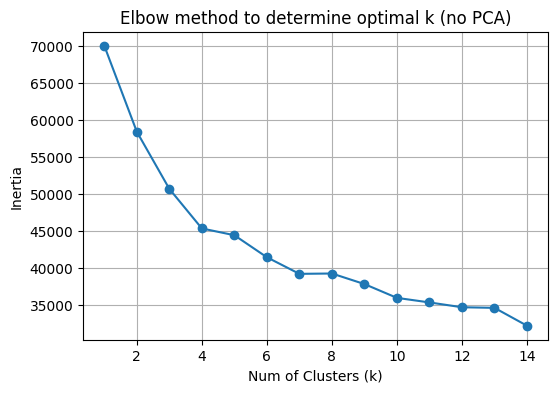

In [181]:
inertia = []
K_range = range(1, 15) # trying with 1 to 15 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Using the  preprocessed data (One-Hot Encoded, without PCA)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method to determine optimal k (no PCA)')
plt.grid(True)
plt.show()

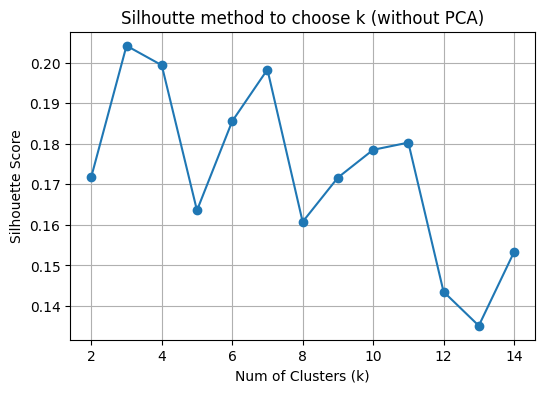

In [182]:
silhouette_scores = []

for k in range(2, 15):  # checking in range from 2 to 15 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhoutte method to choose k (without PCA)')
plt.grid(True)
plt.show()


Adjusted Rand Index: 0.29 (1.0 is perfect, 0.0 is random)


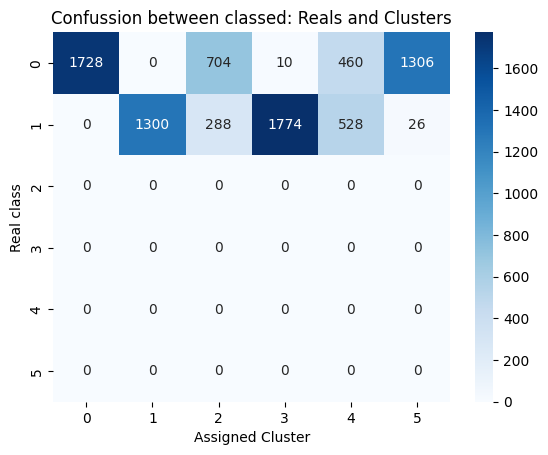


Classification metrics after cluster-label alignment:
Accuracy:  0.90
Precision: 0.90
Recall:    0.90
F1-score:  0.90


In [197]:
# K-Means with 4 clusters
# Checking with 3
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Here we evaluate the clustering results by how similar the clusters are to the actual classes of the mushrooms.
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f} (1.0 is perfect, 0.0 is random)")

# 3. Matriz de confusión para ver cómo se alinean
conf_matrix = confusion_matrix(y, clusters)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confussion between classed: Reals and Clusters")
plt.xlabel("Assigned Cluster")
plt.ylabel("Real class")
plt.show()

# Reasignar clusters a clases reales (para métricas supervisadas)
# Esto usa la moda (valor más frecuente) para mapear cada cluster a la clase real dominante
labels = np.zeros_like(clusters)
for i in range(6):  # Asumes 4 clusters
    mask = clusters == i
    if np.any(mask):
        labels[mask] = mode(y[mask], keepdims=False).mode

# Métricas de clasificación
acc = accuracy_score(y, labels)
prec = precision_score(y, labels, average='weighted')
rec = recall_score(y, labels, average='weighted')
f1 = f1_score(y, labels, average='weighted')

print("\nClassification metrics after cluster-label alignment:")
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")

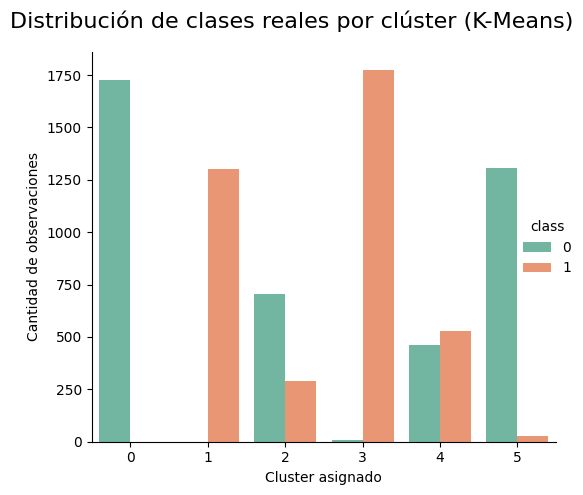

In [198]:
# Crear DataFrame con clusters y clases reales
df_clusters = pd.DataFrame({'cluster': clusters, 'class': y})

# Catplot para ver la distribución de clases por cluster
ax = sns.catplot(x='cluster', hue='class', data=df_clusters, kind='count', palette='Set2')
ax.set_axis_labels("Cluster asignado", "Cantidad de observaciones")
ax.fig.suptitle("Distribución de clases reales por clúster (K-Means)", fontsize=16)
plt.tight_layout()
plt.show()

#### 🌳 <span style="color:#f6f794"> Random Forest </span>

with pca

In [203]:
# df_mapped

df_mapped_1 = df_mapped.drop(columns = "class")
encoder_test = OneHotEncoder(drop='first', sparse_output=False)
encoder_array_test = encoder_test.fit_transform(df_mapped_1)
df_test = pd.DataFrame(encoder_array_test, columns=encoder_test.get_feature_names_out(df_mapped_1.columns))


In [204]:
# Division for training with stratified sampling to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,             # 20% for testing
    stratify=y,                # To maintain the balance of the distribution of the target variable
    random_state=42            # For reproducibility
)

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



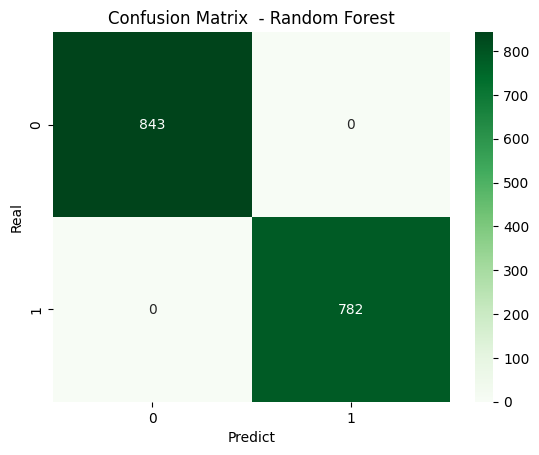

In [205]:
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca_22, y, test_size=0.2, random_state=42)

# 2. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. Evaluar
y_pred = rf.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=["edible", "poisonous"]))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix  - Random Forest")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

whitout pca

añadir profundidad
verificar numero de estimadores

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



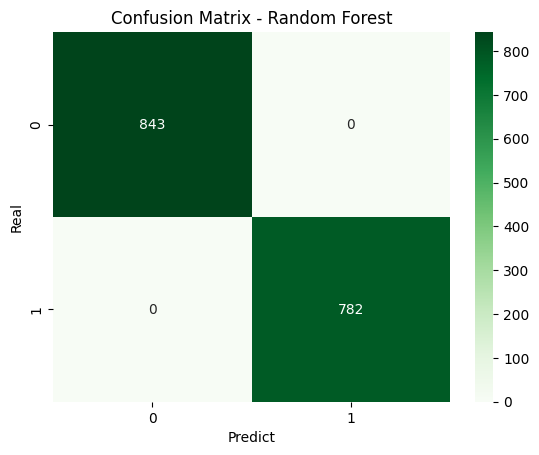

In [206]:
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. Evaluar
y_pred = rf.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=["edible", "poisonous"]))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

K means Interpretation

| Valor ARI | Interpretación                                                          |
| --------- | ----------------------------------------------------------------------- |
| 1.0       | Separación perfecta: los clusters son exactamente las clases reales. 🔥 |
| 0.5–0.9   | Buena separación. Algo de mezcla, pero útil. 👍                         |
| 0.0–0.5   | Poca coincidencia: K-Means no captó bien las clases reales. 🤔          |
| 0.0       | Coincidencia completamente aleatoria. 😵                                |


Random Forest - Interpretation

| Métrica       | Significado                                                                            |
| ------------- | -------------------------------------------------------------------------------------- |
| **Precision** | ¿De las predicciones que hice, cuántas fueron correctas?                               |
| **Recall**    | ¿De los verdaderos positivos, cuántos logré detectar?                                  |
| **F1-Score**  | Promedio entre Precision y Recall (balance). Ideal para datos desbalanceados.          |
| **Accuracy**  | Total de predicciones correctas / total general. Útil si las clases están balanceadas. |
